## Becoming Familiar with the Data Distribution and Characteristics:

In [1]:
#Dependencies...
import pandas as pd
import numpy as np
import random as rd
import requests
import json
import math
import os

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

from scipy.stats import shapiro 
from scipy.stats import lognorm

In [3]:
#Create data file paths:
recruits_path = "../resources/wombi_candidates.csv"
employees_path = "../resources/wombi_employees.csv"

#Read the file paths:
rec = pd.read_csv(recruits_path)
emp = pd.read_csv(employees_path)

In [4]:
emp.count()

wombus_id                          233936
birth_continent                    222243
gender                             231593
age                                231599
college_degree                     205860
problem_solving_skill              224577
technology_skill                   212869
english_skill                      194172
most_recent_income                 226915
total_jobs                         156725
shirt_color_preference             231596
customer_exp_preference            205863
work_env_preference                231596
personal_growth_preference         226924
honest_communication_preference    226920
community_service_preference       229251
remote_work_preference             215217
industry_preference                231597
score                              233936
dtype: int64

In [5]:
#Evaluating the data's distribution...
#Draw a random seed and make the test reproducible:
np.random.seed(100)
#Generate a dataset that contains 1000 log-normal distributed values:
lognorm_set = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)
#Perform a Shapiro-Wilk test for normality:
shapiro(lognorm_set)

ShapiroResult(statistic=0.8157703280448914, pvalue=2.5959249901574765e-32)

## Data Preparation:

In [6]:
emp.dropna(how='any', inplace=True)
emp

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
17,188881,North America,Male,62.0,1.0,12.017056,1.000000,10.092871,"67,850",9.0,Purple,Strongly Agree,Strongly Disagree,Neutral,Disagree,Strongly Agree,On-Site,Higher Education,92.54
18,68091,North America,Female,64.0,0.0,7.912990,17.669932,9.573698,"78,650",6.0,Blue,Agree,Disagree,Agree,Strongly Agree,Strongly Agree,On-Site,Renewable Energy,92.38
25,64175,North America,Male,55.0,1.0,15.882988,16.473167,9.725070,"57,676",6.0,Purple,Agree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Remote,Tech,92.03
29,134150,North America,Male,52.0,0.0,7.457011,26.071113,9.513082,"79,850",3.0,Purple,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,On-Site,Finance,91.35
30,136477,North America,Male,46.0,0.0,18.416560,10.964696,9.932534,"51,009",7.0,Purple,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,On-Site,Finance,91.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233923,212294,Asia,Male,33.0,0.0,15.084267,36.360377,5.186702,"59,778",0.0,Purple,Strongly Disagree,Neutral,Disagree,Neutral,Strongly Agree,Remote,Higher Education,11.46
233925,166766,Asia,Male,57.0,0.0,12.009790,36.991197,4.447794,"67,869",0.0,Blue,Strongly Disagree,Neutral,Strongly Disagree,Neutral,Agree,Hybrid,Tech,11.09
233926,42452,North America,Male,41.0,0.0,13.788663,35.695021,8.586714,"63,188",0.0,Blue,Strongly Disagree,Strongly Agree,Disagree,Strongly Disagree,Agree,Hybrid,Tech,10.70
233927,78448,North America,Female,39.0,1.0,20.651585,36.489073,8.335791,"45,127",0.0,Blue,Neutral,Strongly Agree,Agree,Disagree,Agree,Remote,Higher Education,10.66


In [7]:
#Evaluating the data's distribution...
#Draw a random seed and make the test reproducible:
np.random.seed(100)
#Generate a dataset that contains 1000 log-normal distributed values:
lognorm_set = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)
#Perform a Shapiro-Wilk test for normality:
shapiro(lognorm_set)

ShapiroResult(statistic=0.8157703280448914, pvalue=2.5959249901574765e-32)

In [8]:
#Converting recruits' most recent income to float...
rec["most_recent_income"] = [float(str(i).replace(",", "")) for i in rec["most_recent_income"]]

rec.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference
0,1105,NaN,Female,NaN,0.0,8.400397,23.348271,9.105426,77367.0,5.0,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education
1,1106,North America,Female,52.0,1.0,7.787927,24.799825,9.095713,78979.0,4.0,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance
2,1107,North America,Male,32.0,0.0,23.005739,25.484927,8.967305,38932.0,NaN,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance
3,1108,Africa,Male,49.0,0.0,15.565866,NaN,5.914387,58511.0,NaN,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,NaN,Tech
4,1109,North America,Male,47.0,0.0,12.784366,30.619283,8.751296,65831.0,NaN,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy


In [9]:
#Converting employees' most recent income to float...
emp["most_recent_income"] = [float(str(i).replace(",", "")) for i in emp["most_recent_income"]]

emp.head()

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
17,188881,North America,Male,62.0,1.0,12.017056,1.000000,10.092871,67850.0,9.0,Purple,Strongly Agree,Strongly Disagree,Neutral,Disagree,Strongly Agree,On-Site,Higher Education,92.54
18,68091,North America,Female,64.0,0.0,7.912990,17.669932,9.573698,78650.0,6.0,Blue,Agree,Disagree,Agree,Strongly Agree,Strongly Agree,On-Site,Renewable Energy,92.38
25,64175,North America,Male,55.0,1.0,15.882988,16.473167,9.725070,57676.0,6.0,Purple,Agree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Remote,Tech,92.03
29,134150,North America,Male,52.0,0.0,7.457011,26.071113,9.513082,79850.0,3.0,Purple,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,On-Site,Finance,91.35
30,136477,North America,Male,46.0,0.0,18.416560,10.964696,9.932534,51009.0,7.0,Purple,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,On-Site,Finance,91.28


## Designing the Machine Learning Model:

In [10]:
#Preparing the dataset for linear regression...

#Assign the variables:
X = emp.drop(['score', 'wombus_id', 'birth_continent', 'gender', 'college_degree','shirt_color_preference',
            'customer_exp_preference', 'work_env_preference', 'personal_growth_preference',
             'honest_communication_preference', 'community_service_preference', 'remote_work_preference', 
              'industry_preference',], axis=1)
print(X)
Y = emp.score
print(Y)

         age  problem_solving_skill  technology_skill  english_skill  \
17      62.0              12.017056          1.000000      10.092871   
18      64.0               7.912990         17.669932       9.573698   
25      55.0              15.882988         16.473167       9.725070   
29      52.0               7.457011         26.071113       9.513082   
30      46.0              18.416560         10.964696       9.932534   
...      ...                    ...               ...            ...   
233923  33.0              15.084267         36.360377       5.186702   
233925  57.0              12.009790         36.991197       4.447794   
233926  41.0              13.788663         35.695021       8.586714   
233927  39.0              20.651585         36.489073       8.335791   
233931  39.0              25.924781         37.146986       7.757076   

        most_recent_income  total_jobs  
17                 67850.0         9.0  
18                 78650.0         6.0  
25          

In [11]:
#Importing the modules for regression models:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
#Creating the model:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)


Y_train_pred = model.predict(X_train)

In [13]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_train_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_train_pred))

Coefficients: [ 8.67606058e-02 -3.33034629e+00 -2.84922026e-01  1.39733033e-01
 -9.97137706e-04 -1.16909999e+00]
Intercept: 174.83952250889948
Mean squared error (MSE): 57.95
Coefficient of determination (R^2): 0.13


In [14]:
Y_test_pred = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_test_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_test_pred))
     

Coefficients: [ 8.67606058e-02 -3.33034629e+00 -2.84922026e-01  1.39733033e-01
 -9.97137706e-04 -1.16909999e+00]
Intercept: 174.83952250889948
Mean squared error (MSE): 59.80
Coefficient of determination (R^2): 0.12


In [15]:
#Writing the regression equation:
yintercept = '%.2f' % model.intercept_
age = '%.2f age' % model.coef_[0]
problem_solving = '%.4f problem_solving' % model.coef_[1]
technology='%.4f technology' % model.coef_[2]
english = '%.4f english' % model.coef_[3]
recent_income = '%.4f recent_income' % model.coef_[4]
jobs = '%.2f total_jobs' % model.coef_[4]

In [16]:
#Printing the regression equation:
print('Score = ' + 
      ' ' +
      yintercept +
      ' + ' + 
      age +
      ' '  +
      problem_solving + 
      ' ' +
      technology + 
      ' + ' +
      recent_income +
      ' + ' +
      english  + ' + ' + jobs)

Score =  174.84 + 0.09 age -3.3303 problem_solving -0.2849 technology + -0.0010 recent_income + 0.1397 english + -0.00 total_jobs


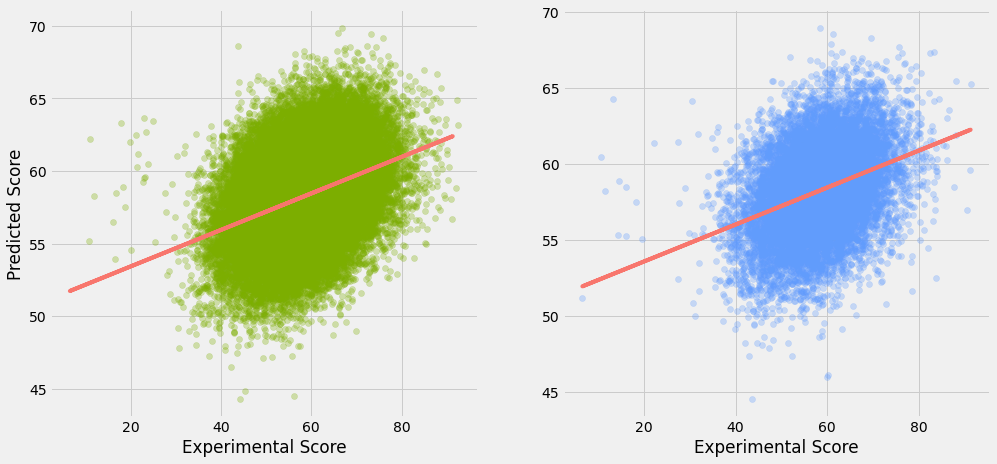

In [17]:
#Visualizations:
plt.figure(figsize=(15,7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted Score')
plt.xlabel('Experimental Score')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=Y_test, y=Y_test_pred, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_test_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental Score')

plt.savefig('emp_score_plot.png')
plt.show()

In [18]:
#Finding the mean values for some of the recruit variables to impute data:
age =rec['age'].mean()
income = rec['most_recent_income'].mean()
tech_skill = rec['technology_skill'].mean()
eng_skill = rec['english_skill'].mean()
solving_skill = rec['problem_solving_skill'].mean()
tot_job = rec['total_jobs'].mean()

print("The mean value for age is " + str(age) + " years old.")
print("The mean value for most recent income is " + str(income) + " WombiCoin.")
print("The mean value for technology skill is " + str(tech_skill) + ".")
print("The mean value for english skill is " + str(eng_skill) + ".")
print("The mean value for problem solving skill is " + str(solving_skill) + ".")
print("The mean value for total jobs is " + str(tot_job) + ".")

The mean value for age is 44.84389140271493 years old.
The mean value for most recent income is 60587.248858447485 WombiCoin.
The mean value for technology skill is 25.027173413425164.
The mean value for english skill is 7.758286662176631.
The mean value for problem solving skill is 14.726201429309466.
The mean value for total jobs is 3.9201277955271565.


In [19]:
#Finding the mode for some of the recruit variables to impute data...

import statistics
from statistics import mode

birth =rec['birth_continent'].mode()
gender = rec['gender'].mode()
work_env = rec['work_env_preference'].mode()
growth = rec['personal_growth_preference'].mode()
comm = rec['honest_communication_preference'].mode()
service = rec['community_service_preference'].mode()
remote = rec['remote_work_preference'].mode()
industry = rec['industry_preference'].mode()
shirt = rec['shirt_color_preference'].mode()

print("The mode for birth continent is " + birth + ".")
print("The mode for gender is " + gender + ".")
print("The mode for work environment is " + work_env + ".")
print("The mode for personal growth experience is " + growth + ".")
print("The mode for communication preference is " + comm + ".")
print("The mode for community service preference is " + service + ".")
print("The mode for remote work preference is " + remote + " work.")
print("The mode for industry preference is the " + industry + ".")
print("The mode for shirt color preference is a " + shirt + " shirt.")

0    The mode for birth continent is North America.
Name: birth_continent, dtype: object
0    The mode for gender is Female.
Name: gender, dtype: object
0    The mode for work environment is Strongly Agree.
Name: work_env_preference, dtype: object
0    The mode for personal growth experience is Agree.
Name: personal_growth_preference, dtype: object
0    The mode for communication preference is Neutral.
Name: honest_communication_preference, dtype: object
0    The mode for community service preference is S...
Name: community_service_preference, dtype: object
0    The mode for remote work preference is Hybrid ...
Name: remote_work_preference, dtype: object
0    The mode for industry preference is the Tech.
Name: industry_preference, dtype: object
0    The mode for shirt color preference is a Purpl...
Name: shirt_color_preference, dtype: object


In [20]:
#Imputing missing values for recruit data:
rec["birth_continent"].fillna("North America", inplace = True)
rec["gender"].fillna("Female", inplace = True)
rec["age"].fillna(44.843891403, inplace = True)
rec["college_degree"].fillna("Unsure", inplace = True)
rec["most_recent_income"].fillna(60587.2488585, inplace = True)
rec["total_jobs"].fillna(3.9201277955, inplace = True)
rec["technology_skill"].fillna(25.0271734134, inplace = True)
rec["english_skill"].fillna(7.758286662, inplace = True)
rec["problem_solving_skill"].fillna(14.72620143, inplace = True)
rec["customer_exp_preference"].fillna("Unsure", inplace = True)
rec["work_env_preference"].fillna("Strongly Agree", inplace = True)
rec["personal_growth_preference"].fillna("Agree", inplace = True)
rec["shirt_color_preference"].fillna("Purple", inplace = True)
rec["honest_communication_preference"].fillna("Neutral", inplace = True)
rec["community_service_preference"].fillna("Strongly Agree", inplace = True)
rec["remote_work_preference"].fillna("Hybrid", inplace = True)
rec["industry_preference"].fillna("Tech", inplace = True)

## Manipulating and Producing Datasets:

In [21]:
#Creating a score variable for the candidates:

rec['age'].apply(lambda x: float(x))
rec['problem_solving_skill'].apply(lambda x: float(x))
rec['english_skill'].apply(lambda x: float(x))
rec['technology_skill'].apply(lambda x: float(x))
rec['total_jobs'].apply(lambda x: float(x))

cal_age = 0.08*(rec['age'])
cal_solve = -4.2825*(rec['problem_solving_skill'])
cal_eng = 0.1231*(rec['english_skill'])
cal_tech = -0.2768*(rec['technology_skill'])
cal_jobs = -0.0011072*(rec['total_jobs'])
cal_income = -0.0014*(rec['most_recent_income'])

#Compute, assign, and print the score:
cal_score = 210.88 + cal_age + cal_solve + cal_tech + cal_eng + cal_income + cal_jobs
rec = rec.assign(score = cal_score)

In [22]:
rec.head(n=100)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score
0,1105,North America,Female,44.843891,0.0,8.400397,23.348271,9.105426,77367.0,5.000000,Purple,Strongly Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Higher Education,64.831552
1,1106,North America,Female,52.000000,1.0,7.787927,24.799825,9.095713,78979.0,4.000000,Blue,Neutral,Strongly Disagree,Disagree,Strongly Agree,Strongly Agree,Hybrid,Finance,65.368264
2,1107,North America,Male,32.000000,0.0,23.005739,25.484927,8.967305,38932.0,3.920128,Blue,Strongly Disagree,Disagree,Agree,Agree,Neutral,On-Site,Finance,54.458430
3,1108,Africa,Male,49.000000,0.0,15.565866,25.027173,5.914387,58511.0,3.920128,Purple,Disagree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech,60.019978
4,1109,North America,Male,47.000000,0.0,12.784366,30.619283,8.751296,65831.0,3.920128,Purple,Strongly Disagree,Disagree,Neutral,Strongly Agree,Strongly Agree,On-Site,Renewable Energy,60.325079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1200,North America,Female,29.000000,0.0,18.532026,2.928836,9.989034,50705.0,9.000000,Purple,Neutral,Strongly Disagree,Agree,Strongly Disagree,Neutral,Hybrid,Tech,63.258582
96,1201,Asia,Female,54.000000,0.0,12.691090,25.949435,6.390515,66076.0,4.000000,Blue,Unsure,Agree,Disagree,Neutral,Agree,On-Site,Finance,61.943449
97,1202,North America,Female,44.843891,0.0,14.726201,25.091513,7.758287,56462.0,5.000000,Blue,Agree,Strongly Disagree,Agree,Neutral,Strongly Agree,Hybrid,Tech,66.359932
98,1203,North America,Female,49.000000,0.0,20.471441,25.220982,8.967629,45601.0,4.000000,Blue,Agree,Strongly Agree,Agree,Neutral,Strongly Agree,Hybrid,Tech,57.407972


In [23]:
rec.describe()

,wombus_id,age,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,score
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,1329.000000,44.843891,14.726201,25.027173,7.758287,60587.248858,3.920128,60.603588
std,129.759393,10.117637,3.908771,5.013991,1.399816,10225.403221,1.055389,4.931621
min,1105.000000,18.000000,4.112905,1.000000,3.638857,29595.000000,1.000000,25.578550
25%,1217.000000,38.000000,12.089943,23.060649,6.604019,54430.000000,3.000000,58.316200
50%,1329.000000,44.843891,14.726201,25.665339,7.758287,60717.000000,3.920128,60.560197
75%,1441.000000,51.000000,17.043050,28.502451,9.021910,67373.000000,4.000000,62.466106
max,1553.000000,72.000000,26.553890,34.268587,10.082081,88650.000000,9.000000,95.637981


In [24]:
#Choosing the top 100 candidates based on score:
sorted_rec = rec.sort_values(['score'], ascending = [False])
print(sorted_rec)

#Highlighting the top 100 candidates and exporting them to a new dataframe:
top100 = sorted_rec.head(100)

     wombus_id birth_continent  gender   age college_degree  \
50        1155            Asia  Female  27.0            0.0   
221       1326   North America  Female  56.0            0.0   
270       1375   North America    Male  45.0            0.0   
157       1262   North America    Male  39.0         Unsure   
384       1489   North America  Female  48.0            0.0   
..         ...             ...     ...   ...            ...   
79        1184   North America    Male  42.0            0.0   
77        1182   North America  Female  38.0            1.0   
358       1463          Europe    Male  42.0            0.0   
174       1279   North America    Male  37.0            0.0   
427       1532   North America    Male  34.0            0.0   

     problem_solving_skill  technology_skill  english_skill  \
50                5.895108         29.261292       6.245151   
221               9.865737          4.926959       7.758287   
270               8.871629         21.788948       9.4

In [25]:
#Exporting the manipulated datasets:
rec.to_csv(r'../resources/recruits.csv')
emp.to_csv(r'../resources/employees.csv')
top100.to_csv(r'../resources/top100.csv')

Text(0.5, 1.0, 'Top 100 Candidates')

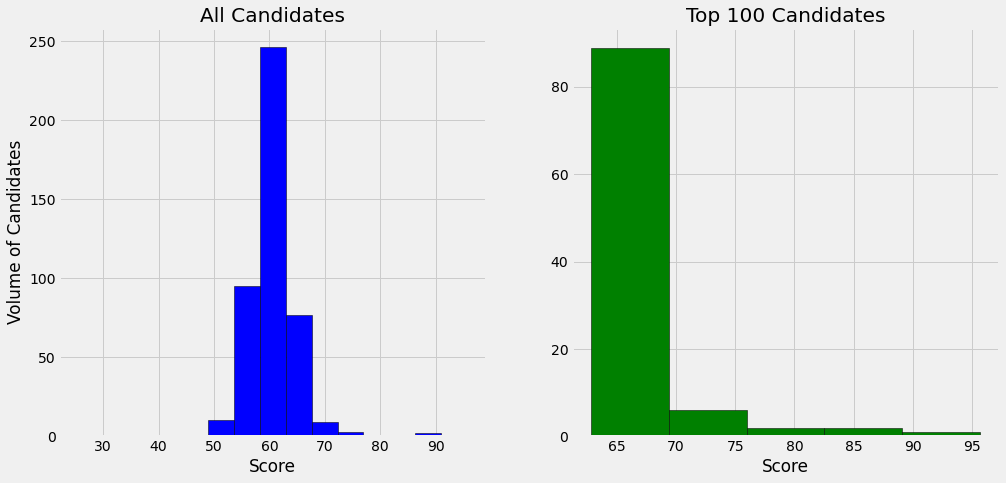

In [26]:
#Visualize the (predicted/calculated) candidate scores:
plt.figure(figsize=(15,7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.hist(rec['score'], bins = 15, color = 'blue', edgecolor= 'black')
plt.ylabel('Volume of Candidates')
plt.xlabel('Score')
plt.title('All Candidates')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.hist(top100['score'], bins = 5, color = 'green', edgecolor= 'black')
plt.xlabel('Score')
plt.title('Top 100 Candidates')

## Establishing Top Candidates via SQL:

In [27]:
#Establish a connection to SQL: 
from sqlalchemy import create_engine

# Creating connection object
protocol = 'postgresql'
username = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432
database_name = 'postgres'

In [28]:
#Create engine connection:
connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'

engine = create_engine(connection_string)



In [29]:
rec.to_sql(name='candidates', con=engine, if_exists='replace', index=False)
engine.execute("SELECT wombus_id, gender, score FROM candidates ORDER BY score DESC LIMIT 100").fetchall()

[(1155, 'Female', 95.63798062656406),
 (1326, 'Female', 87.87023994418335),
 (1375, 'Male', 86.79235631890789),
 (1262, 'Male', 81.7359366584693),
 (1489, 'Female', 79.87369967554118),
 (1264, 'Male', 74.91396737304983),
 (1223, 'Male', 72.97555936038417),
 (1295, 'Female', 72.53747017677317),
 (1255, 'Male', 71.97214294273398),
 (1439, 'Male', 71.9706573736399),
 (1113, 'Male', 69.936842838414),
 (1228, 'Female', 68.83304600230159),
 (1177, 'Female', 68.36528928718917),
 (1183, 'Female', 68.29501347100215),
 (1285, 'Male', 68.04721905984061),
 (1210, 'Male', 68.00804162957773),
 (1392, 'Female', 67.94525762585532),
 (1430, 'Male', 67.29683385886901),
 (1533, 'Female', 66.67634851985643),
 (1215, 'Female', 66.37581350456503),
 (1202, 'Female', 66.35993198902916),
 (1291, 'Female', 66.26613506905522),
 (1310, 'Female', 66.25782083904848),
 (1363, 'Female', 66.0853167377378),
 (1300, 'Female', 65.98212506527597),
 (1229, 'Male', 65.82518972664171),
 (1541, 'Male', 65.76699242484379),
 (1

## Comparing Observed and Predicted Data:

In [30]:
#Let's compare the distribution of the recruit scores and employee scores:
rec.describe()

,wombus_id,age,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,score
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,1329.000000,44.843891,14.726201,25.027173,7.758287,60587.248858,3.920128,60.603588
std,129.759393,10.117637,3.908771,5.013991,1.399816,10225.403221,1.055389,4.931621
min,1105.000000,18.000000,4.112905,1.000000,3.638857,29595.000000,1.000000,25.578550
25%,1217.000000,38.000000,12.089943,23.060649,6.604019,54430.000000,3.000000,58.316200
50%,1329.000000,44.843891,14.726201,25.665339,7.758287,60717.000000,3.920128,60.560197
75%,1441.000000,51.000000,17.043050,28.502451,9.021910,67373.000000,4.000000,62.466106
max,1553.000000,72.000000,26.553890,34.268587,10.082081,88650.000000,9.000000,95.637981


In [31]:
emp.describe()

,wombus_id,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,score
count,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000,65616.000000
mean,118325.559071,44.996327,0.210391,14.989572,25.411677,7.656602,60027.744910,3.902219,58.212428
std,67616.530533,10.008668,0.407589,3.792462,5.082807,1.559628,9980.131252,1.299363,8.161107
min,1560.000000,15.000000,0.000000,1.000000,1.000000,1.395281,20121.000000,0.000000,6.530000
25%,59797.250000,38.000000,0.000000,12.452447,23.032062,6.362111,53319.750000,3.000000,52.750000
50%,118307.500000,45.000000,0.000000,15.000141,26.385269,7.954565,59999.500000,4.000000,58.140000
75%,176910.250000,52.000000,0.000000,17.538596,28.852244,9.096604,66704.250000,5.000000,63.660000
max,235489.000000,86.000000,1.000000,30.000000,38.607789,10.250000,101360.000000,10.000000,92.540000


In [32]:
#Top 10000 employees:
sorted_emp = emp.sort_values(['score'], ascending = [False])
emp100 = sorted_emp.head(100)
emp100.to_csv(r'../resources/top100.csv')

Text(0.5, 1.0, 'Top 100 Candidates')

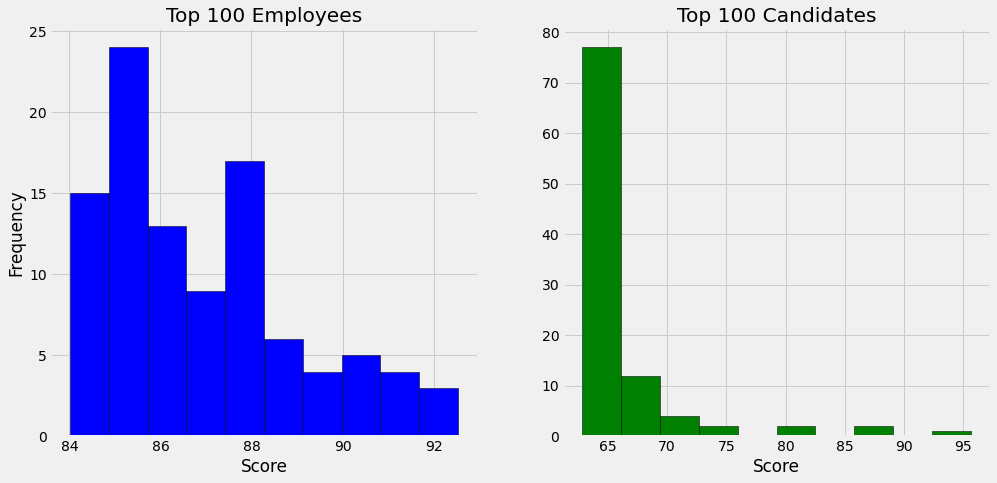

In [33]:
#Visualize the top 100 scores:
plt.figure(figsize=(15,7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.hist(emp100['score'], bins = 10, color = 'blue', edgecolor= 'black')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.title('Top 100 Employees')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.hist(top100['score'], bins = 10, color = 'green', edgecolor= 'black')
plt.xlabel('Score')
plt.title('Top 100 Candidates')

Text(0.5, 1.0, 'Candidate Scores')

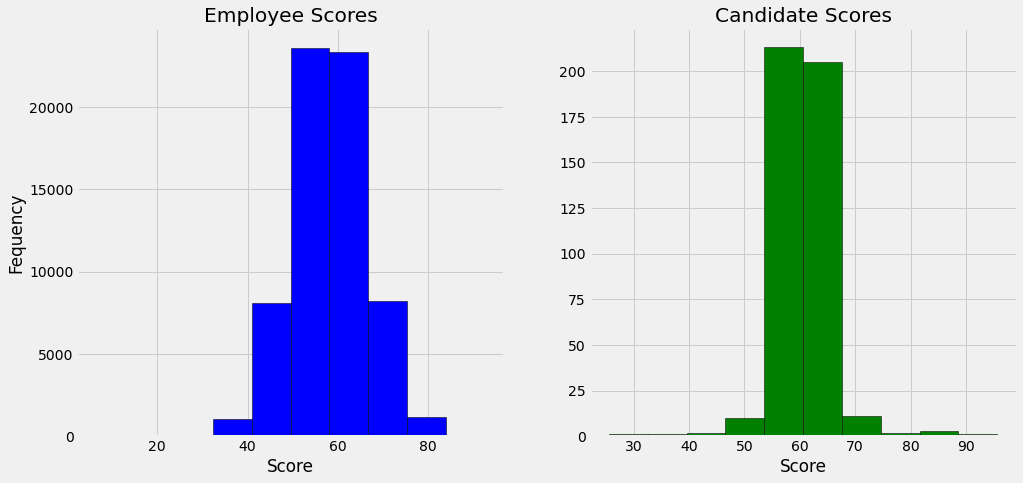

In [34]:
#Visualize the employee and candidate scores:
plt.figure(figsize=(15,7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.hist(emp['score'], bins = 10, color = 'blue', edgecolor= 'black')
plt.ylabel('Fequency')
plt.xlabel('Score')
plt.title('Employee Scores')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.hist(rec['score'], bins = 10, color = 'green', edgecolor= 'black')
plt.xlabel('Score')
plt.title('Candidate Scores')

Text(0.5, 1.0, 'Top 100 Employee Scores')

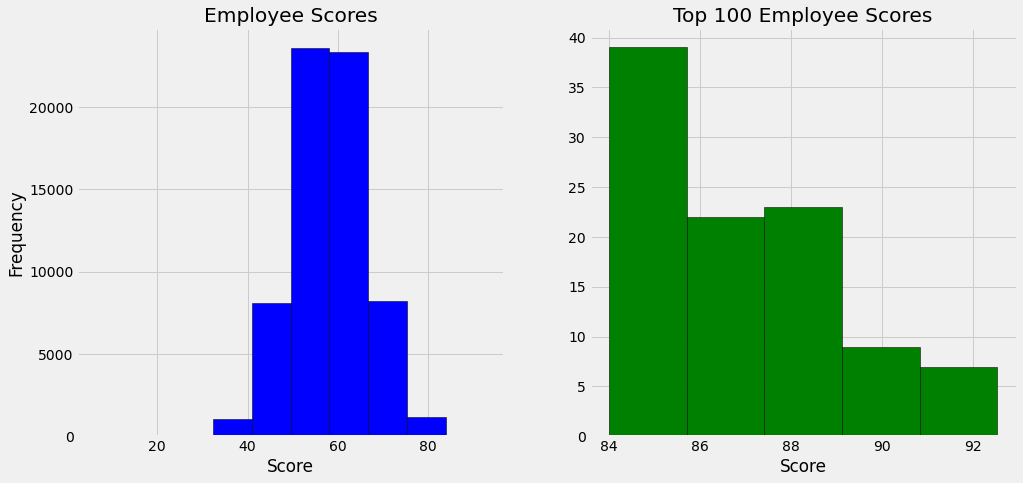

In [35]:
#Visualize all employee and top 100 employee scores:
plt.figure(figsize=(15,7))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.hist(emp['score'], bins = 10, color = 'blue', edgecolor= 'black')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.title('Employee Scores')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.hist(emp100['score'], bins = 5, color = 'green', edgecolor= 'black')
plt.xlabel('Score')
plt.title('Top 100 Employee Scores')

In [36]:
#Creating a predicted score variable for the candidates:

emp['age'].apply(lambda x: float(x))
emp['problem_solving_skill'].apply(lambda x: float(x))
emp['english_skill'].apply(lambda x: float(x))
emp['technology_skill'].apply(lambda x: float(x))
emp['total_jobs'].apply(lambda x: float(x))
emp['most_recent_income'].apply(lambda x: float(x))

pred_age = 0.08*(emp['age'])
pred_solve = -4.2825*(emp['problem_solving_skill'])
pred_eng = 0.1231*(emp['english_skill'])
pred_tech = -0.2768*(emp['technology_skill'])
pred_jobs = -0.0011072*(emp['total_jobs'])
pred_income = -0.0014*(emp['most_recent_income'])

#Compute, assign, and print the score:
pred_score = 210.88 + pred_age + pred_solve + pred_tech + pred_eng + pred_income + pred_jobs
emp = emp.assign(score_pred = pred_score)


In [37]:
emp.head(n=25)

,wombus_id,birth_continent,gender,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,shirt_color_preference,customer_exp_preference,work_env_preference,personal_growth_preference,honest_communication_preference,community_service_preference,remote_work_preference,industry_preference,score,score_pred
17,188881,North America,Male,62.0,1.0,12.017056,1.000000,10.092871,67850.0,9.0,Purple,Strongly Agree,Strongly Disagree,Neutral,Disagree,Strongly Agree,On-Site,Higher Education,92.54,70.342625
18,68091,North America,Female,64.0,0.0,7.912990,17.669932,9.573698,78650.0,6.0,Blue,Agree,Disagree,Agree,Strongly Agree,Strongly Agree,On-Site,Renewable Energy,92.38,68.283464
25,64175,North America,Male,55.0,1.0,15.882988,16.473167,9.725070,57676.0,6.0,Purple,Agree,Neutral,Strongly Agree,Strongly Agree,Strongly Agree,Remote,Tech,92.03,63.145446
29,134150,North America,Male,52.0,0.0,7.457011,26.071113,9.513082,79850.0,3.0,Purple,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,On-Site,Finance,91.35,65.266606
30,136477,North America,Male,46.0,0.0,18.416560,10.964696,9.932534,51009.0,7.0,Purple,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,On-Site,Finance,91.28,62.458398
31,188911,North America,Female,57.0,1.0,16.118535,9.797605,9.889500,57056.0,7.0,Blue,Strongly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Hybrid,Renewable Energy,91.26,65.031645
35,128315,North America,Female,36.0,0.0,15.715828,5.766666,10.012149,58116.0,8.0,Purple,Agree,Strongly Disagree,Agree,Strongly Agree,Strongly Agree,On-Site,Finance,90.87,64.721992
39,200528,North America,Female,37.0,1.0,12.363898,14.837953,9.790600,66937.0,6.0,Purple,Strongly Agree,Neutral,Strongly Agree,Neutral,Strongly Agree,On-Site,Tech,90.51,64.271243
40,164351,Europe,Male,45.0,0.0,18.668738,15.874888,7.103526,50345.0,5.0,Purple,Strongly Agree,Neutral,Agree,Strongly Agree,Strongly Agree,Remote,Tech,90.47,60.522867
44,228768,South America,Female,44.0,0.0,13.532299,1.000000,10.110915,63862.0,10.0,Purple,Agree,Strongly Disagree,Agree,Neutral,Strongly Agree,On-Site,Tech,90.24,67.997912


In [38]:
emp['score'].apply(lambda x: float(x))
emp['score_pred'].apply(lambda x: float(x))

error = emp['score'] - emp['score_pred']
emp = emp.assign(error = error)

emp100.to_csv(r'../resources/employees.csv')

In [39]:
emp100.describe()

,wombus_id,age,college_degree,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,123934.800000,47.550000,0.180000,11.631528,18.388592,8.434155,68864.410000,5.400000,86.942300
std,68313.949845,9.113621,0.386123,3.756219,7.388923,1.437158,9884.800843,1.675733,2.136171
min,1657.000000,28.000000,0.000000,2.897237,1.000000,5.435630,41870.000000,2.000000,84.010000
25%,68400.000000,40.750000,0.000000,9.389171,13.814839,6.912988,62461.500000,4.000000,85.167500
50%,129559.500000,48.000000,0.000000,11.093145,19.427653,9.133666,70281.500000,5.000000,86.420000
75%,183620.250000,55.000000,0.000000,14.064663,24.321490,9.675553,74765.500000,6.000000,88.192500
max,234612.000000,66.000000,1.000000,21.889583,30.750351,10.110915,91849.000000,10.000000,92.540000


In [40]:
top100.describe()

,wombus_id,age,problem_solving_skill,technology_skill,english_skill,most_recent_income,total_jobs,score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1324.460000,49.596878,10.863500,21.408482,8.099268,69413.142443,4.501246,66.212580
std,123.670336,10.566251,3.082001,6.397295,1.332751,9587.831235,1.318497,5.337721
min,1105.000000,27.000000,4.112905,1.000000,5.369867,45991.000000,1.000000,62.828320
25%,1216.500000,41.750000,8.847710,18.833398,6.976559,64071.500000,3.920128,63.604016
50%,1316.000000,49.000000,11.099031,22.459318,7.758287,70146.000000,4.000000,64.773223
75%,1428.500000,57.000000,13.128146,25.559551,9.408324,75984.750000,5.000000,65.864424
max,1541.000000,72.000000,18.532026,33.239862,10.082081,88650.000000,9.000000,95.637981


In [42]:
import scipy.stats as stats

stats.ttest_ind(emp100['score'], top100['score'])

Ttest_indResult(statistic=36.05605092203318, pvalue=5.978370930612641e-89)